# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Занятие 1. Простейший анализ данных.

*Примечание.* Подробнее про работу с различными библиотеками Питона можно посмотреть в наших <a target="_blank" href="https://mipt-stats.gitlab.io/courses/python.html">туториалах</a>.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette="Set2", font_scale=1.3)

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


## Выборка

Пусть нам попались какие-то данные.

В данном случае — 100 различных значений какой-то величины.

In [4]:
size = 100  # размер выборки
sample = sps.norm.rvs(size=size)  # генерируем реализацию выборки из N(0, 1)

In [5]:
sample

array([ 0.18194158, -0.25615941,  1.06641589,  0.75408662, -0.27298569,
       -0.48785146,  0.06389586,  0.06931158,  1.20101511, -0.05058356,
        0.38647379,  1.6533856 ,  1.94382518, -0.6589453 ,  0.00525215,
       -0.4350668 ,  1.49231052, -0.21993824, -1.58934948,  1.01170254,
        0.74862956,  2.34967368, -0.12625531,  0.4565468 , -2.25593097,
        0.11461452, -1.46209209, -0.89480138, -0.9338383 ,  0.04023288,
       -0.09653258,  0.25366423,  0.78833134,  0.04676809, -0.74400416,
        0.37168747,  0.81458355,  0.52558439,  0.78010891,  2.77056825,
        0.63379658,  1.09947961, -0.2751256 , -1.27757449,  0.15048644,
        1.14454997, -1.15579511, -1.16411371,  0.06202959,  1.41582788,
       -0.59167838, -0.3813411 , -0.51088848, -0.42810045, -0.11484398,
        1.08750375, -0.43346036,  0.49242856, -0.66767493,  0.76196727,
       -0.71687653, -0.12479597,  1.28058419, -0.5650949 ,  1.29348502,
        0.45350047, -0.85668117, -0.85907081,  1.33907747,  0.66

Нарисуем их график. По оси x — значения реализаций случайной величины.

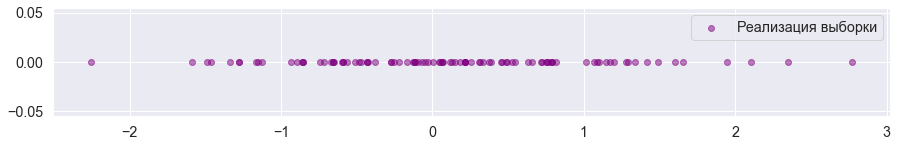

In [6]:
plt.figure(figsize=(15, 2))  # объявляем график и его размер
plt.scatter(sample, np.zeros(size), alpha=0.5, color='purple', label="Реализация выборки")
plt.legend()  # добавляем легенду
plt.show()  # печатаем график

Для начала давайте попробуем прикинуть, как распределены данные.

## Гистограмма

**Идея:** разделим всю числовую прямую на несколько "корзин" и посмотрим, сколько объектов попало в каждую.

**Формально:**

Пусть $X_1, \ldots X_n$ — выборка.

$-\infty = a_0 < \ldots < a_i < \ldots < a_{m} = +\infty$ — разбиение на $m$ корзин.

$n_k = \sum \limits_{i=0}^{n-1} I(X_i \in [a_k, a_{k+1}])$ — количество элементов в $i$-й корзине.


Можно построить график в виде столбиков, где высота столбика показывает, сколько объектов попало в соответствующую корзину.

Этот график по форме похож на график плотности распределения нашей случайной величины.



Гистограмму можно построить с помощью библиотеки `matplotlib`.

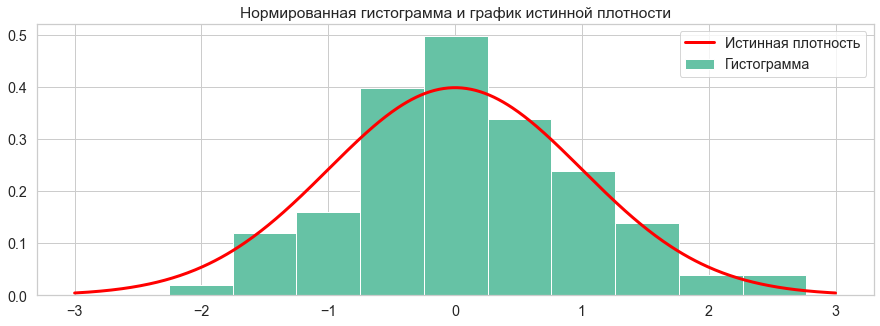

In [7]:
# Тяжелые графики стоит рисовать на белом фоне
sns.set_style('whitegrid')

plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма и график истинной плотности")

# Гистограмма:
# x - данные,
# bins - количество корзин, 
# density - нормируем, так что сумма высот столбиков равна 1
plt.hist(x=sample, bins = 10, density=True, label = "Гистограмма") 

grid = np.linspace(-3, 3, 500)  # сетка из 500 чисел от -3 до 3
plt.plot(grid, sps.norm.pdf(grid), lw=3, color='red', label='Истинная плотность')

plt.legend()

plt.show()

**Другой способ**

Для построения гистограммы удобно использовать библиотеку `seaborn` (подробнее — в туториалах).

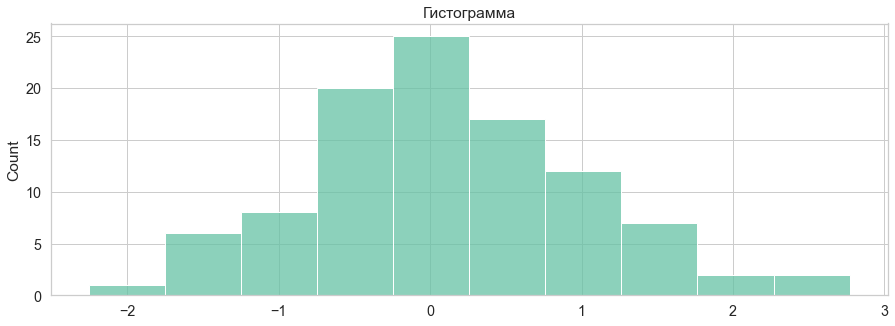

In [13]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма")

# data - наши данные, 
# bins - количество корзин
sns.histplot(data=sample, bins=10)

plt.show()

Посмотрим, на что влияет количество корзин.

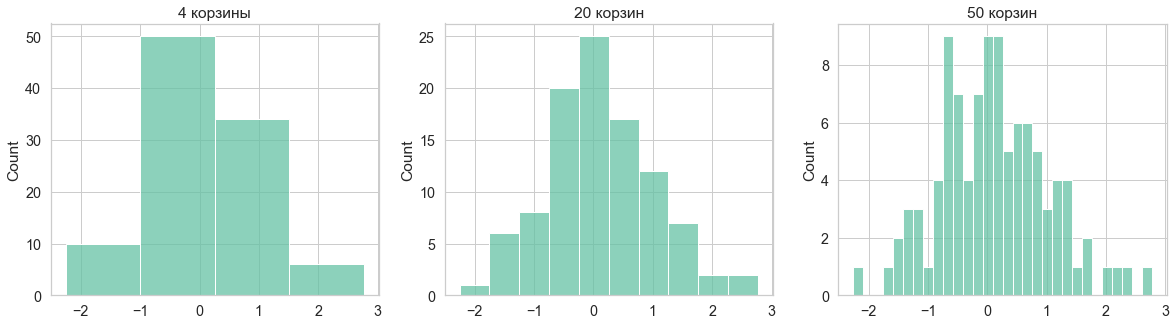

In [14]:
# Делаем несколько графиков на одной фигуре
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)

axs[0].set_title("4 корзины" )
axs[1].set_title("20 корзин" )
axs[2].set_title("50 корзин" )

sns.histplot(data=sample, bins=4, ax=axs[0])
sns.histplot(data=sample, bins=10, ax=axs[1])
sns.histplot(data=sample, bins=30, ax=axs[2])

plt.show()

## Ядерная оценка плотности

Функция `kdeplot` позволяет легко строить ядерные оценки плотности.

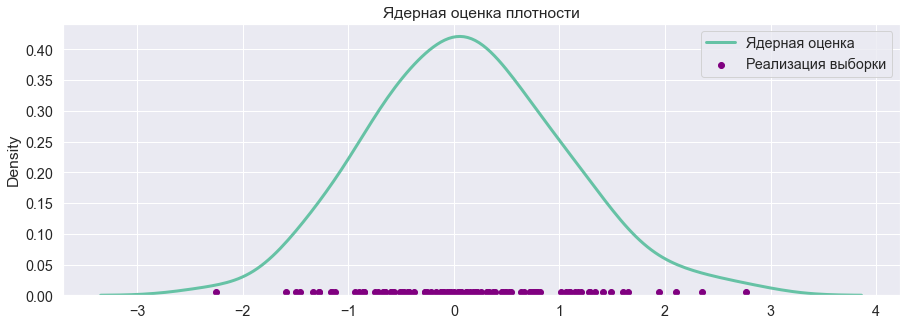

In [15]:
# Легкие графики стоит рисовать на сером фоне
sns.set_style('darkgrid')

plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.legend()
plt.show()


Сравним график ядерной оценки с графиком истинной плотности.

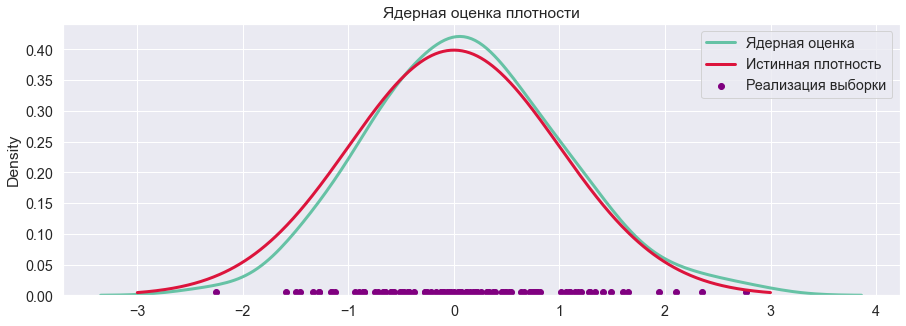

In [16]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.plot(grid, sps.norm.pdf(grid), lw=3, color='crimson', label='Истинная плотность')

plt.legend()
plt.show()

Также метод `histplot` позволяет сразу строить и гистограмму, и ядерную оценку плотности.

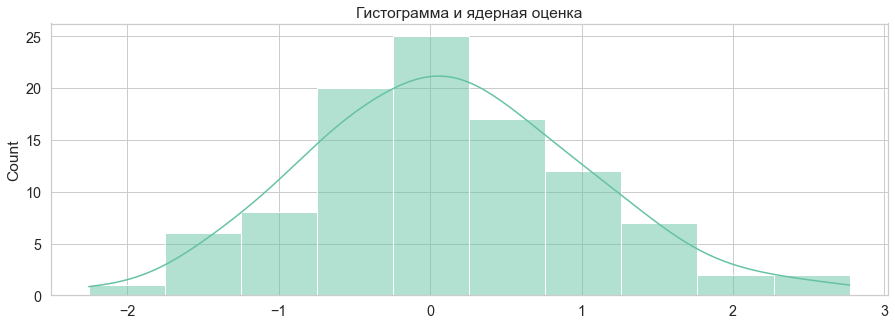

In [17]:
# Тяжелые графики стоит рисовать на белом фоне
sns.set_style('whitegrid')

plt.figure(figsize=(15, 5))

plt.title("Гистограмма и ядерная оценка")

sns.histplot(data=sample, kde=True)
plt.show()

##Точечные оценки

Рассмотрим **выборочное среднее**.

$\overline{X}  = \frac1n \sum\limits_{i=1}^n X_i$

Сгенерируем выборку из $\mathcal{N}(3, 25)$ размера 1000:


In [18]:
size = 1000  # размер выборки
sample = sps.norm(loc=3, scale=5).rvs(size=size)

Посчитаем выборочное среднее

In [19]:
mean = sample.mean()

print(f"Выборочное среднее: {mean:.4}")

Выборочное среднее: 2.953


Что хорошего может нам дать эта величина?

Давайте посмотрим, как она ведет себя с ростом размера выборки!

$X_1, X_2, .....X_j, ... X_n$

Посчитаем выборочное среднее по всем подвыборкам $X_1, ..., X_j$ для $j \in \{1, \ldots, n\}$:

$\left(\overline{X}\right)_j = \frac1j \sum\limits_{i=1}^j X_i$

In [20]:
sample.cumsum() [:10]

array([ 3.52399123,  4.73526468, 12.07271938,  1.17896915, -0.28926524,
       -3.93036671,  3.75432039, -2.35198663, -2.81819318, -3.06394606])

In [21]:
means = sample.cumsum() / (np.arange(size) + 1)  # кумулятивное усреднение

Построим график зависимости среднего от размера префикса:

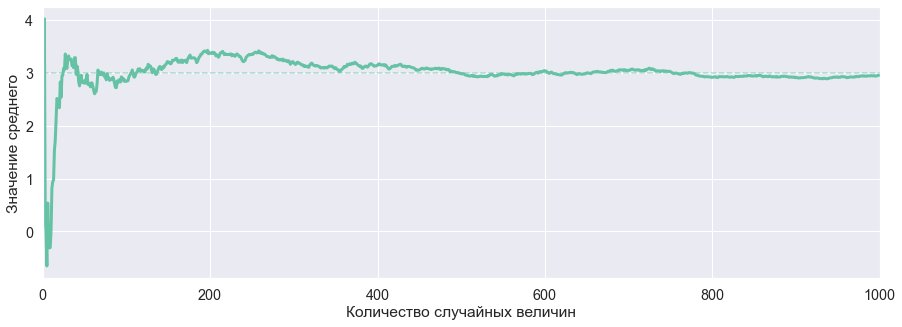

In [22]:
# Легкие графики стоит рисовать на сером фоне
sns.set_style('darkgrid')

plt.figure(figsize=(15, 5))
plt.plot(means, lw=3)
plt.hlines(3, 0, size, alpha=0.5, linestyles='--')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

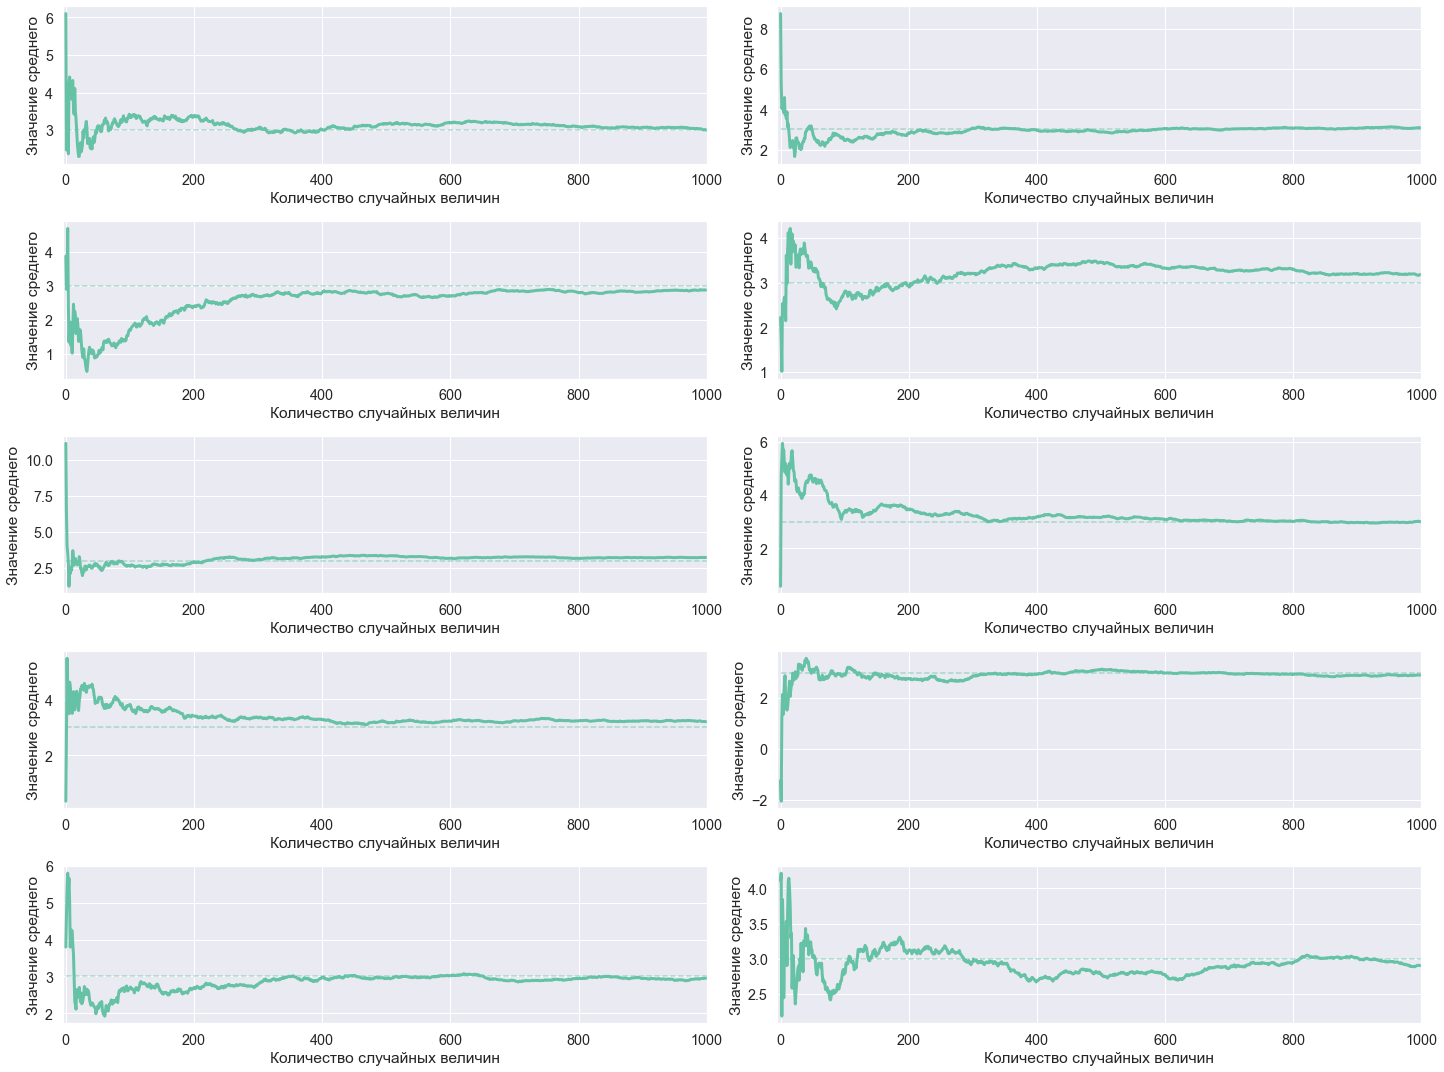

In [23]:
plt.figure(figsize=(20, 15))

for i in range(10):

    # Генерация выборки и вычисление средних
    sample = sps.norm(loc=3, scale=5).rvs(size=size)
    means = sample.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, lw=3)
    plt.hlines(3, 0, size, alpha=0.5, linestyles='--')
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Как видим, со временем график среднего приближается к значению параметра $a$ нормального распределения.

Вспомним теорию вероятностей!

## Закон больших чисел

**Формулировка.**

Пусть $\xi_1, ..., \xi_n$ — независимые одинаково распределенные случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = \mu$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} \mu.$$ 







Вспомнимаем, что для нормального распределения  $\mathsf{E}\xi_i = a$, то есть согласно ЗБЧ $$\overline{X} = \frac{X_1 + ... + X_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$

*Здесь $\overline{X} $ обозначает последовательность средних.*

Сгенерируем большое количество независимых наборов случайных величин

In [24]:
size = 1000  # размер выборки
samples_count = 500  # количество выборок

sample = sps.norm(loc=3, scale=5).rvs(size=(samples_count, size))  # генерация сразу всех выборок
means = sample.cumsum(axis=1) / (np.arange(size) + 1)  # кумулятивное усреднение внутри каждой выборки

Нарисуем траектории среднего для всех реализациий на одном графике.

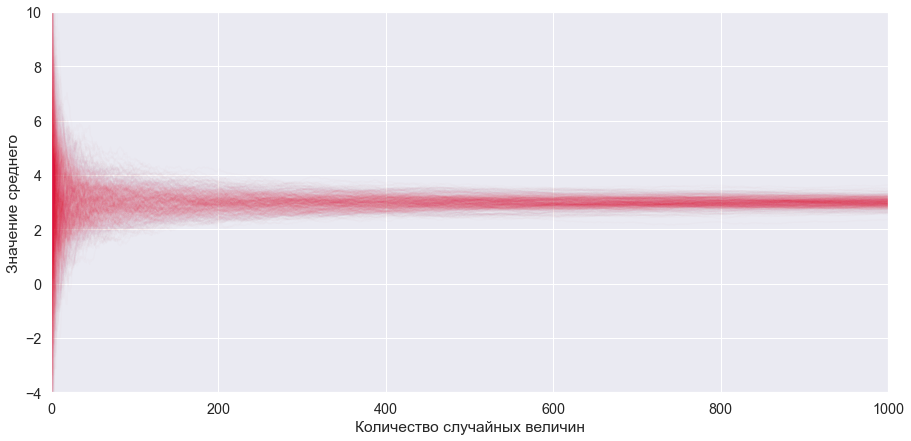

In [28]:
plt.figure(figsize=(15, 7))

# для каждой выборки рисуем отдельную кривую
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.01)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')

# ограничения графика по осям
plt.xlim((0, size))
plt.ylim((-4, 10));

**Вывод:** 

При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.

Таким образом, в данном случае выборочное среднее — "хорошая оценка", т.к. с ростом выборки его значение приближается к истинному значению параметра.

Это  эксперимент намекает нам, что некоторые оценки могут быть "хорошими" в каком-лмбо смысле. О том, какие у оценок бывают "хорошие" свойства — на следующих занятиях!